## Student grades prediction

In [1]:
## importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\Grades.csv") ## creating dataframe
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [3]:
df.shape

(571, 43)

In [4]:
df.drop_duplicates(inplace=True) ## no duplicate in data set
df.shape

(571, 43)

In [5]:
df.info()  ## dataset have null value

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

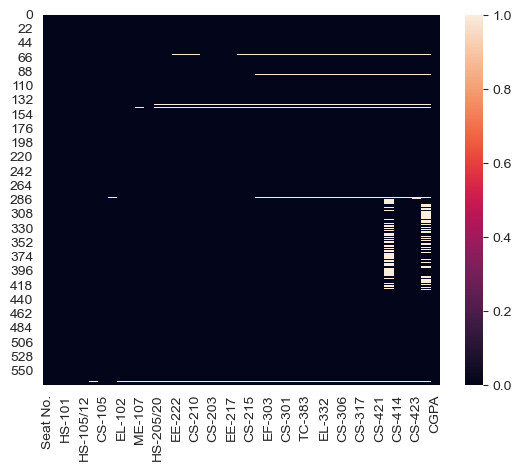

In [6]:
sns.heatmap(df.isnull())
plt.show()

In [7]:
df.fillna("Absent",inplace=True)  ## handaling dataset

In [8]:
lebal = {'Absent':0,'A':1, 'A+':2, 'A-':3,'B': 4, 'B+':5, 'B-':6, 'C':7, 'C+':8, 'C-':9, 'D':10, 'D+':11, 'F':12,"W":13,"WU":14,"I":15}

In [9]:
## lebal encoding
cols=['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412']
for i in cols: 
    df.replace({i :lebal} ,inplace=True)
    
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,6,11,9,7,9,11,10,9,6,...,9,9,9,9,3,1,9,4,3,2.205
1,CS-97002,1,10,11,10,6,7,10,1,11,...,11,10,7,10,3,6,7,7,4,2.008
2,CS-97003,1,4,1,6,5,1,6,5,3,...,4,4,1,7,1,1,1,3,1,3.608
3,CS-97004,10,8,11,10,10,3,11,9,10,...,11,7,11,9,6,4,8,8,8,1.906
4,CS-97005,3,3,3,5,1,1,3,5,1,...,6,5,5,6,3,1,3,3,1,3.448


In [10]:
df['EE-222'].unique()

array([ 3,  9,  1,  6,  5,  8, 11,  4,  0,  7, 13,  2, 10, 12],
      dtype=int64)

In [11]:
df.drop("Seat No.",axis=1,inplace=True)

In [12]:
## handling outliers
from scipy.stats import zscore

In [13]:
z = zscore(df.drop("CGPA",axis=1))
z.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,0.397942,1.770900,1.710122,0.547333,1.363666,2.657832,1.776524,1.324028,0.418351,1.019394,...,0.664740,1.165171,1.149470,1.526619,0.944473,-0.188895,-0.941113,1.702359,-0.309920,-0.233466
1,-1.239126,1.411559,2.381012,1.482109,0.367946,1.173242,1.776524,-1.294223,2.284589,1.335224,...,1.693376,1.753163,1.498777,0.861199,1.294437,-0.188895,1.040360,0.894004,0.731046,0.134791
2,-1.239126,-0.744483,-0.973436,0.235740,0.036039,-1.053643,0.321672,0.014902,-0.701392,-0.875584,...,-0.706774,-0.304808,-0.597064,-1.135059,0.244546,-0.891559,-0.941113,-1.531061,-0.656908,-0.969980
3,1.707597,0.692879,2.381012,1.482109,1.695573,-0.311348,2.140237,1.324028,1.911341,0.703565,...,1.350498,1.753163,0.450857,2.192038,0.944473,0.865102,0.247771,1.298181,1.078034,1.607820
4,-0.584299,-1.103823,-0.302547,-0.075852,-1.291589,-1.053643,-0.769466,0.014902,-1.447887,-0.875584,...,-0.706774,0.283183,-0.247757,0.195780,-0.105418,-0.188895,-0.941113,-0.722706,-0.656908,-0.969980


In [14]:
np.where(z>3)

(array([ 60,  60,  60,  60,  60,  91,  91,  91, 137, 137, 137, 143, 143,
        143, 281, 281, 281, 281, 288, 340, 340, 352, 352, 382, 387, 387,
        410, 423, 424, 432, 447, 447, 453, 453, 454, 454, 481, 513, 516,
        522, 527, 543, 543, 550, 550, 557, 560], dtype=int64),
 array([ 2, 10, 11, 17, 19,  0,  4, 15,  2,  4,  6,  2,  4,  6,  0,  8, 11,
        15, 11, 24, 37, 24, 37, 37, 37, 40, 37, 37, 37, 40, 36, 37, 36, 40,
        36, 37, 31, 40, 40, 40, 40, 36, 40, 37, 40, 37, 37], dtype=int64))

In [15]:
z.iloc[60,2]

3.387346455556707

In [16]:
df = df[(z<3).all(axis=1)]
df.shape

(545, 42)

In [17]:
x = df.iloc[:,:-1]
x.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,6,11,9,7,9,11,10,9,6,9,...,7,9,9,9,9,3,1,9,4,3
1,1,10,11,10,6,7,10,1,11,10,...,10,11,10,7,10,3,6,7,7,4
2,1,4,1,6,5,1,6,5,3,3,...,3,4,4,1,7,1,1,1,3,1
3,10,8,11,10,10,3,11,9,10,8,...,9,11,7,11,9,6,4,8,8,8
4,3,3,3,5,1,1,3,5,1,3,...,3,6,5,5,6,3,1,3,3,1


In [18]:
y = df.iloc[:,-1]
y.head()

0    2.205
1    2.008
2    3.608
3    1.906
4    3.448
Name: CGPA, dtype: float64

In [19]:
## feature selection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [20]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005,random_state=0))
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [21]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [22]:
selected_feat = x.columns[(feature_sel_model.get_support())]

print("total Feature: {}".format(x.shape[1]))
print('feature selected: {}'.format(len(selected_feat)))

total Feature: 41
feature selected: 40


In [23]:
print(selected_feat)
x = x[selected_feat]
x.head()

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-214', 'EE-217', 'CS-212', 'CS-215',
       'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442',
       'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403', 'CS-421',
       'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412'],
      dtype='object')


,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,6,11,9,7,9,11,10,9,6,9,...,7,9,9,9,9,3,1,9,4,3
1,1,10,11,10,6,7,10,1,11,10,...,10,11,10,7,10,3,6,7,7,4
2,1,4,1,6,5,1,6,5,3,3,...,3,4,4,1,7,1,1,1,3,1
3,10,8,11,10,10,3,11,9,10,8,...,9,11,7,11,9,6,4,8,8,8
4,3,3,3,5,1,1,3,5,1,3,...,3,6,5,5,6,3,1,3,3,1


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
print("x_train :",x_train.shape)
print('x_test :',x_test.shape)
print("y_train :",y_train.shape)
print('y_test :',y_test.shape)

x_train : (436, 40)
x_test : (109, 40)
y_train : (436,)
y_test : (109,)


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [27]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [28]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [29]:
print('r2 score:',r2_score(y_train,y_train_pred))
print("mean_absolute_error:", mean_absolute_error(y_train,y_train_pred))
print('mean_squared_error:',mean_squared_error(y_train,y_train_pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_train,y_train_pred)))

r2 score: 0.9046375640230517
mean_absolute_error: 0.10024531633231447
mean_squared_error: 0.03346903718368919
root_mean_squared_error: 0.1829454486553005


In [30]:
print('r2 score:',r2_score(y_test,y_test_pred))
print("mean_absolute_error:", mean_absolute_error(y_test,y_test_pred))
print('mean_squared_error:',mean_squared_error(y_test,y_test_pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

r2 score: 0.9545917845269959
mean_absolute_error: 0.08987716775028112
mean_squared_error: 0.014016282936244975
root_mean_squared_error: 0.11839038363078724


In [31]:
from sklearn.tree import DecisionTreeRegressor

In [32]:
dtc = DecisionTreeRegressor()
dtc.fit(x_train,y_train)

DecisionTreeRegressor()

In [33]:
y_train_pred = dtc.predict(x_train)
y_test_pred = dtc.predict(x_test)

In [34]:
print('r2 score:',r2_score(y_train,y_train_pred))
print("mean_absolute_error:", mean_absolute_error(y_train,y_train_pred))
print('mean_squared_error:',mean_squared_error(y_train,y_train_pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_train,y_train_pred)))

r2 score: 1.0
mean_absolute_error: 0.0
mean_squared_error: 0.0
root_mean_squared_error: 0.0


In [35]:
print('r2 score:',r2_score(y_test,y_test_pred))
print("mean_absolute_error:", mean_absolute_error(y_test,y_test_pred))
print('mean_squared_error:',mean_squared_error(y_test,y_test_pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

r2 score: 0.7897454435419937
mean_absolute_error: 0.1921651376146789
mean_squared_error: 0.06489987155963302
root_mean_squared_error: 0.2547545319707444


In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [38]:
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

In [39]:
print('r2 score:',r2_score(y_train,y_train_pred))
print("mean_absolute_error:", mean_absolute_error(y_train,y_train_pred))
print('mean_squared_error:',mean_squared_error(y_train,y_train_pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_train,y_train_pred)))

r2 score: 0.9868835593970512
mean_absolute_error: 0.03963630733944945
mean_squared_error: 0.004603433561238514
root_mean_squared_error: 0.06784860765880545


In [40]:
print('r2 score:',r2_score(y_test,y_test_pred))
print("mean_absolute_error:", mean_absolute_error(y_test,y_test_pred))
print('mean_squared_error:',mean_squared_error(y_test,y_test_pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

r2 score: 0.9524577319110658
mean_absolute_error: 0.08663201834862365
mean_squared_error: 0.014675007022935713
root_mean_squared_error: 0.12114044338261154


In [41]:
from sklearn.neighbors import KNeighborsRegressor

In [42]:
knn= KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [43]:
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

In [44]:
print('r2 score:',r2_score(y_train,y_train_pred))
print("mean_absolute_error:", mean_absolute_error(y_train,y_train_pred))
print('mean_squared_error:',mean_squared_error(y_train,y_train_pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_train,y_train_pred)))

r2 score: 0.9111490524232824
mean_absolute_error: 0.08069036697247706
mean_squared_error: 0.03118372174311926
root_mean_squared_error: 0.17658913257366451


In [45]:
print('r2 score:',r2_score(y_test,y_test_pred))
print("mean_absolute_error:", mean_absolute_error(y_test,y_test_pred))
print('mean_squared_error:',mean_squared_error(y_test,y_test_pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

r2 score: 0.959855152381696
mean_absolute_error: 0.0894018348623853
mean_squared_error: 0.012391624220183486
root_mean_squared_error: 0.11131767254206983


In [46]:
from sklearn.svm import SVR

In [47]:
svr = SVR()
svr.fit(x_train,y_train)

SVR()

In [48]:
y_train_pred = svr.predict(x_train)
y_test_pred = svr.predict(x_test)

In [49]:
print('r2 score:',r2_score(y_train,y_train_pred))
print("mean_absolute_error:", mean_absolute_error(y_train,y_train_pred))
print('mean_squared_error:',mean_squared_error(y_train,y_train_pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_train,y_train_pred)))

r2 score: 0.9778805554740021
mean_absolute_error: 0.06281508559932353
mean_squared_error: 0.007763187923409679
root_mean_squared_error: 0.08810895484234096


In [50]:
print('r2 score:',r2_score(y_test,y_test_pred))
print("mean_absolute_error:", mean_absolute_error(y_test,y_test_pred))
print('mean_squared_error:',mean_squared_error(y_test,y_test_pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

r2 score: 0.9762663833316767
mean_absolute_error: 0.05926967396344683
mean_squared_error: 0.007325922916335909
root_mean_squared_error: 0.0855916054081001


In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
pram_grid = ({
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma'  : ['scale', 'auto'],
    "C"      : [0.01,0.1,10,20]
})

In [53]:
svr_cv = GridSearchCV(estimator=svr,param_grid=pram_grid,scoring="neg_mean_squared_error",cv=5)
svr_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 10, 20], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='neg_mean_squared_error')

In [54]:
svr_cv.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [55]:
y_train_pred = svr_cv.predict(x_train)
y_test_pred = svr_cv.predict(x_test)

In [56]:
print('r2 score:',r2_score(y_train,y_train_pred))
print("mean_absolute_error:", mean_absolute_error(y_train,y_train_pred))
print('mean_squared_error:',mean_squared_error(y_train,y_train_pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_train,y_train_pred)))

r2 score: 0.9859794734324078
mean_absolute_error: 0.06081627996866359
mean_squared_error: 0.004920737607196589
root_mean_squared_error: 0.07014796937329397


In [57]:
print('r2 score:',r2_score(y_test,y_test_pred))
print("mean_absolute_error:", mean_absolute_error(y_test,y_test_pred))
print('mean_squared_error:',mean_squared_error(y_test,y_test_pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

r2 score: 0.9738447407605548
mean_absolute_error: 0.06270760765345842
mean_squared_error: 0.008073418211927924
root_mean_squared_error: 0.08985220204273195
